In [21]:
%pip install soundfile simpleaudio librosa scipy matplotlib numpy


  Using cached simpleaudio-1.0.4.tar.gz (2.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build simpleaudio
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for simpleaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [31 lines of output]
      C:\Users\Nischal\AppData\Local\Temp\pip-build-env-atqcrs67\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      C:\Users\Nischal\AppData\Local\Temp\pip-build-env-atqcrs67\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: MIT License
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              *******************************************

In [ ]:
# Import and read a speech file
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
import scipy.signal as signal

In [46]:
file_path = 'audio1.wav' 
audio, sr = librosa.load(file_path, sr=None)

In [24]:
#2 Display basic information
duration = librosa.get_duration(y=audio, sr=sr)
num_samples = len(audio)
intervals = librosa.effects.split(audio, top_db=30) 
active_duration = sum([start_end[1] - start_end[0] for start_end in intervals]) / sr
print(f"Sample Rate: {sr} Hz")
print(f"Number of Samples: {num_samples}")
print(f"Total Duration: {duration:.2f} seconds")
print(f"Active Speech Duration: {active_duration:.2f} seconds")

Sample Rate: 22050 Hz
Number of Samples: 167226
Total Duration: 7.58 seconds
Active Speech Duration: 6.64 seconds


In [48]:
from IPython.display import Audio
print("\nPlaying original audio...")
Audio(audio, rate=sr)


Playing original audio...


In [49]:
#3 i. Slicing and Normalization
slice_limit = 2 * sr
sliced_signal = audio[:slice_limit]
normalized_signal = librosa.util.normalize(sliced_signal)

In [50]:
#3 ii. Amplification and De-amplification
amplified = audio * 2.0
de_amplified = audio * 0.5


In [51]:
# 3 iii. Up-sampling and Down-sampling
up_sampled = librosa.resample(audio, orig_sr=sr, target_sr=sr*2)
down_sampled = librosa.resample(audio, orig_sr=sr, target_sr=sr//2)

Text(138.59722222222223, 0.5, 'Amplitude')

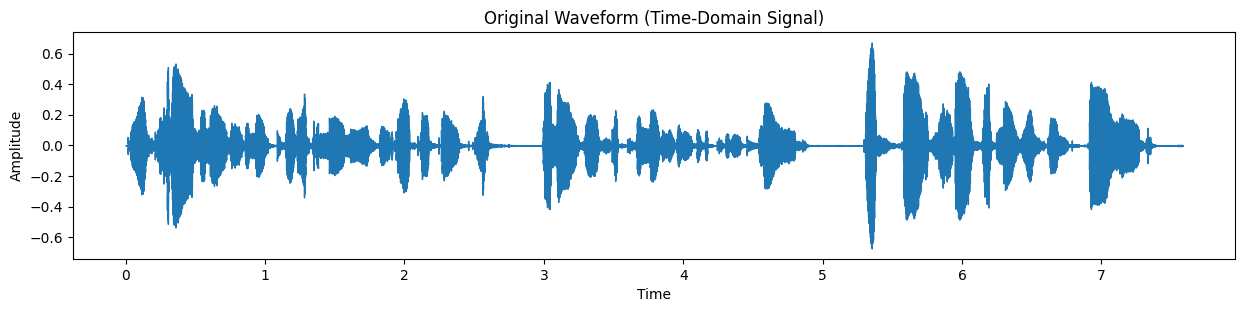

In [44]:
# Time Domain Signal
plt.figure(figsize=(15, 10), dpi=100)
plt.subplot(3, 1, 1) 
librosa.display.waveshow(audio, sr=sr)
plt.title("Original Waveform (Time-Domain Signal)")
plt.ylabel("Amplitude")

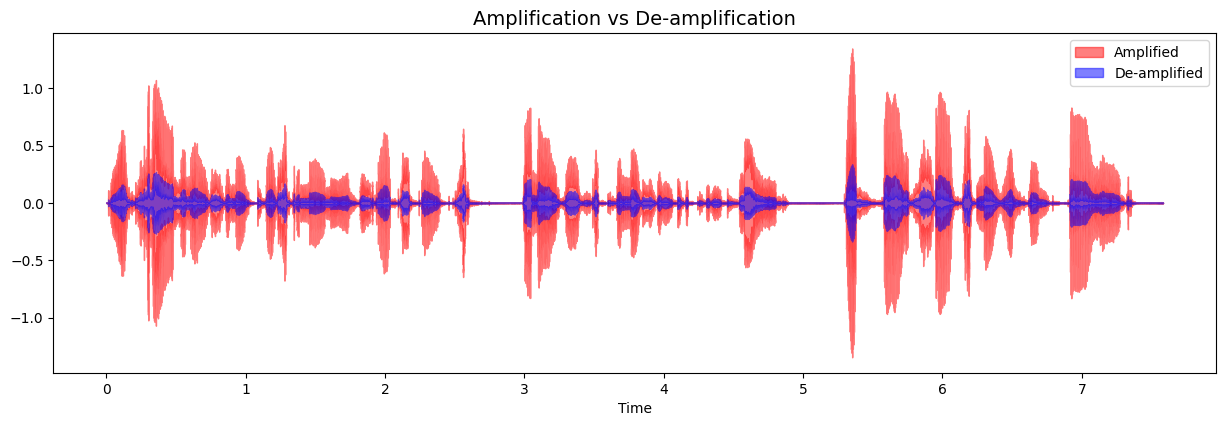

In [42]:
# Amplification comparison
plt.figure(figsize=(15, 15), dpi=100)
plt.subplot(3, 1, 2) # Changed from (3, 2, 3) to (3, 1, 2)
librosa.display.waveshow(amplified, sr=sr, color='r', alpha=0.5, label='Amplified')
librosa.display.waveshow(de_amplified, sr=sr, color='b', alpha=0.5, label='De-amplified')
plt.title("Amplification vs De-amplification", fontsize=14)
plt.legend()


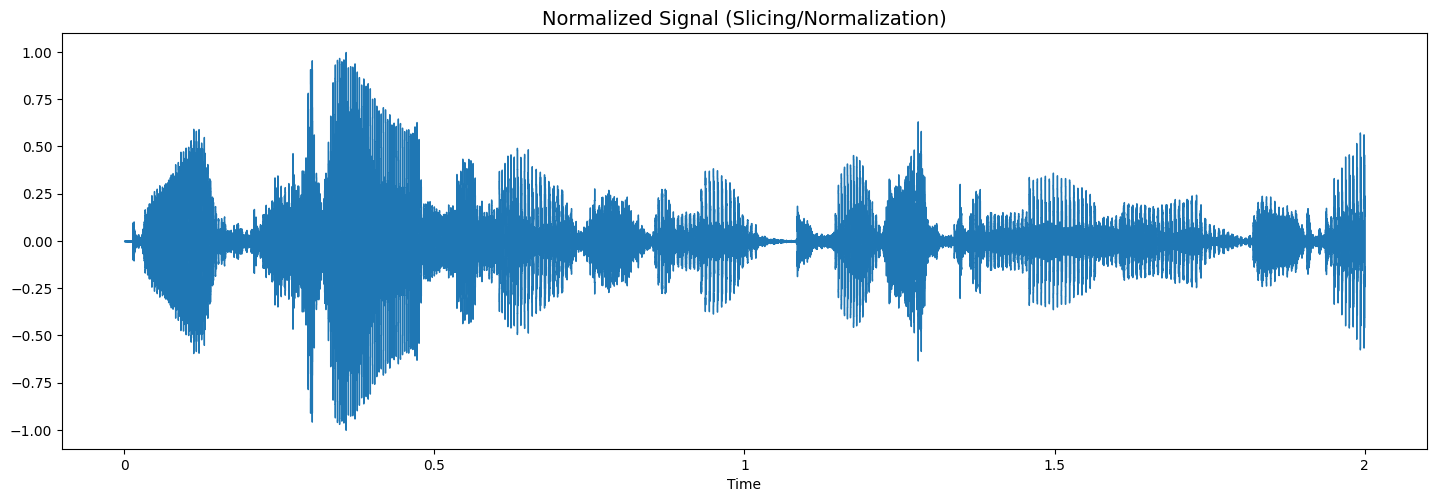

In [43]:
# Resampling
plt.figure(figsize=(15, 15), dpi=100)
plt.subplot(3, 1, 2) 
librosa.display.waveshow(normalized_signal, sr=sr)
plt.title("Normalized Signal (Slicing/Normalization)", fontsize=14)
plt.tight_layout(pad=3.0) 
plt.show()